In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
from sklearn.preprocessing import LabelEncoder

In [3]:
import matplotlib.pyplot as plt

In [4]:
import os 
os.chdir("D:\Classification of Mushrooms")
data=pd.read_csv('mushrooms.csv',na_values=['-','?','!','#','$','%','&','/','|','(',')','()','*',',','.',':',';','<','=','>','?','@','{}','{','}','`','~','^'])

In [5]:
data.head(3)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m


In [6]:
data.isnull().sum()

class                          0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64

In [7]:
data=data.dropna()

In [8]:
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [9]:
le=LabelEncoder()

In [10]:
data['class']=list(le.fit_transform(data.iloc[:,0]))
data['cap-shape']=list(le.fit_transform(data.iloc[:,1]))
data['cap-surface']=list(le.fit_transform(data.iloc[:,2]))
data['cap-color']=list(le.fit_transform(data.iloc[:,3]))
data['bruises']=list(le.fit_transform(data.iloc[:,4]))
data.odor=list(le.fit_transform(data.iloc[:,5]))
data['gill-attachment']=list(le.fit_transform(data.iloc[:,6]))
data['gill-spacing']=list(le.fit_transform(data.iloc[:,7]))
data['gill-size']=list(le.fit_transform(data.iloc[:,8]))
data['gill-color']=list(le.fit_transform(data.iloc[:,9]))
data['stalk-shape']=list(le.fit_transform(data.iloc[:,10]))
data['stalk-root']=list(le.fit_transform(data.iloc[:,11]))
data['stalk-surface-above-ring']=list(le.fit_transform(data.iloc[:,12]))
data['stalk-surface-below-ring']=list(le.fit_transform(data.iloc[:,13]))
data['stalk-color-above-ring']=list(le.fit_transform(data.iloc[:,14]))
data['stalk-color-below-ring']=list(le.fit_transform(data.iloc[:,15]))
data['veil-type']=list(le.fit_transform(data.iloc[:,16]))
data['veil-color']=list(le.fit_transform(data.iloc[:,17]))
data['ring-number']=list(le.fit_transform(data.iloc[:,18]))
data['ring-type']=list(le.fit_transform(data.iloc[:,19]))
data['spore-print-color']=list(le.fit_transform(data.iloc[:,20]))
data.population=list(le.fit_transform(data.iloc[:,21]))
data.habitat=list(le.fit_transform(data.iloc[:,22]))

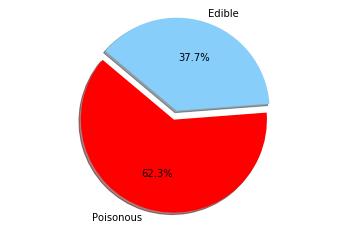

In [11]:
labels = 'Poisonous','Edible'
sizes = [215, 130]
colors = ['red','lightskyblue']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

In [12]:
data.head(3)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,2,...,2,5,5,0,0,1,3,1,3,5
1,0,5,2,7,1,0,1,0,0,2,...,2,5,5,0,0,1,3,2,2,1
2,0,0,2,6,1,3,1,0,0,3,...,2,5,5,0,0,1,3,2,2,3


In [13]:
# I use a list "color_features" to store the color column names. 
# Not really sure if there is an easier way to do this. Do let me know if there is
color_features = []
for i in data.columns:
    if 'color' in i:
        color_features.append(i)
# create our color dataframe and inspect first 3 rows with head()
data_color = data[color_features]
data_color.head(3)

,cap-color,gill-color,stalk-color-above-ring,stalk-color-below-ring,veil-color,spore-print-color
0,4,2,5,5,0,1
1,7,2,5,5,0,2
2,6,3,5,5,0,2


In [14]:
# correlation matrix using the corr() method
data_corr = data_color.astype(float).corr()  # used the astype() or else I get empty results
data_corr

,cap-color,gill-color,stalk-color-above-ring,stalk-color-below-ring,veil-color,spore-print-color
cap-color,1.000000,-0.242099,0.046088,0.056865,0.055906,-0.105214
gill-color,-0.242099,1.000000,0.124320,0.107444,0.065453,0.404772
stalk-color-above-ring,0.046088,0.124320,1.000000,0.503110,0.050623,0.318965
stalk-color-below-ring,0.056865,0.107444,0.503110,1.000000,0.051065,0.279251
veil-color,0.055906,0.065453,0.050623,0.051065,1.000000,0.134637
spore-print-color,-0.105214,0.404772,0.318965,0.279251,0.134637,1.000000


In [15]:
# import the relevant modules
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

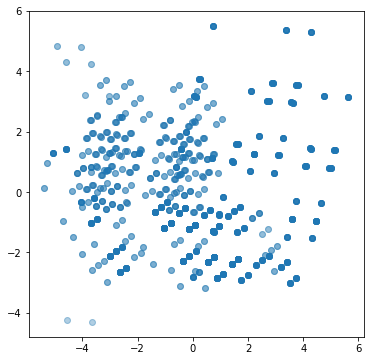

In [16]:
X = data_color.values
# calling sklearn PCA 
pca = PCA(n_components=5)
# fit X and apply the reduction to X 
x_3d = pca.fit_transform(X)

# Let's see how it looks like in 2D - could do a 3D plot as well
plt.figure(figsize = (6,6))
plt.scatter(x_3d[:,0],x_3d[:,1], alpha=0.1)
plt.show()

In [17]:
 #Set a 3 KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=0)
# Compute cluster centers and predict cluster indices
X_clustered = kmeans.fit_predict(x_3d)

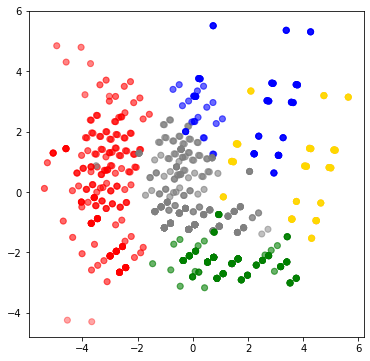

In [18]:
# scatter plot of the 5 clusters of the color features of the dataset that we made using the kmeans clustering method.
LABEL_COLOR_MAP = {0 : 'r',
                   1 : 'g',
                   2 : 'b',3:'gold',4:'grey'}

label_color = [LABEL_COLOR_MAP[i] for i in X_clustered]
plt.figure(figsize = (6,6))
plt.scatter(x_3d[:,0],x_3d[:,1], c= label_color, alpha=0.1)
plt.show()

In [19]:
data.shape

(5644, 23)

In [20]:
train_data=data.iloc[:3644,0:]
val_data=data.iloc[3645:,1:]

In [21]:
x,y=train_data.iloc[:,1:].values,train_data.iloc[:,0].values

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [23]:
print(pd.value_counts(y_train, sort=False))
print(pd.value_counts(y_test, sort=False))

0    2501
1     414
dtype: int64
0    626
1    103
dtype: int64


# Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,roc_curve,auc

In [25]:
lr=LogisticRegression()
model=lr.fit(x_train,y_train)

D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [26]:
test_pred=model.predict(x_test)
train_pred=model.predict(x_train)

In [27]:
from sklearn.metrics import precision_score,recall_score,accuracy_score 

In [28]:
confusion_matrix_train=confusion_matrix(y_train,train_pred)
confusion_matrix_test= confusion_matrix(y_test,test_pred)

In [29]:
print(confusion_matrix_train)
print(confusion_matrix_test)

[[2501    0]
 [   0  414]]
[[626   0]
 [  0 103]]


In [30]:
Accuracy=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
TNR= confusion_matrix_test[0,0]/(confusion_matrix_test[0,0] +confusion_matrix_test[0,1])
TPR= confusion_matrix_test[1,1]/(confusion_matrix_test[1,0] +confusion_matrix_test[1,1])

print("TNR: ",TNR)
print("TPR: ",TPR)
print("Accuracy: ",Accuracy)

TNR:  1.0
TPR:  1.0
Accuracy:  1.0


In [31]:
print(accuracy_score(y_train, train_pred))
print(accuracy_score(y_test,test_pred))

1.0
1.0


In [32]:
train_pred_prob=model.predict_proba(x_train)
train_pred_prob  = train_pred_prob[:,1]
fpr, tpr, thresholds = roc_curve(y_train, train_pred_prob)
roc_auc = auc(fpr, tpr)
thresholds

array([1.99949776e+00, 9.99497757e-01, 7.07020291e-01, 3.22428670e-06])

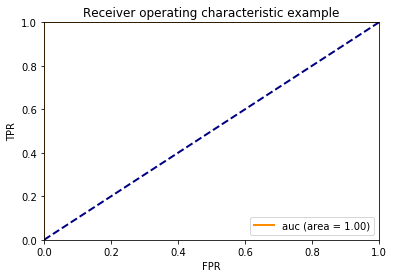

In [33]:
plt.figure()
lw = 2
plt.plot(fpr,tpr, color='darkorange',
         lw=lw, label='auc (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# KNN

In [34]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [35]:
# Predicting the Test set results
y_pred = knn.predict(x_test)
train_pred=knn.predict(x_train)
print('train=',accuracy_score(train_pred,y_train))
print('test=',accuracy_score(y_pred,y_test))




train= 0.9996569468267581
test= 1.0


# SVM

In [36]:
from sklearn.svm import SVC
svm = SVC(kernel = 'linear', random_state = 0)
svm.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [37]:
# Predicting the Test set results
y_pred = svm.predict(x_test)
train_pred=svm.predict(x_train)
print('train=',accuracy_score(train_pred,y_train))
print('test=',accuracy_score(y_pred,y_test))


train= 1.0
test= 1.0


# Navie Bayes

In [38]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [39]:
# Predicting the Test and train sets results
y_pred = GNB.predict(x_test)
train_pred=GNB.predict(x_train)
print('train=',accuracy_score(train_pred,y_train))
print('test=',accuracy_score(y_pred,y_test))


train= 0.788336192109777
test= 0.7489711934156379


# Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [41]:
# Predicting the Test and train sets results
y_pred = dt.predict(x_test)
train_pred=dt.predict(x_train)
print('train=',accuracy_score(train_pred,y_train))
print('test=',accuracy_score(y_pred,y_test))


train= 1.0
test= 1.0


# XGBOOSTING

In [42]:
import xgboost as XGB


In [43]:
dmatrix = XGB.DMatrix(data=x,label=y)

In [44]:
model1 = XGB.XGBClassifier(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                         max_depth = 5, alpha = 10, n_estimators = 10)

In [45]:
model1.fit(x_train,y_train)

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=10, n_jobs=1,
              nthread=None, objective='reg:squarederror', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [46]:
# Predicting the Test and train sets results
y_pred = model1.predict(x_test)
train_pred=model1.predict(x_train)
print('train=',accuracy_score(train_pred,y_train))
print('test=',accuracy_score(y_pred,y_test))


train= 1.0
test= 1.0


# RandomForest

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
rfc=RandomForestClassifier(n_estimators=50,max_features=10)
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [49]:
# Predicting the Test and train sets results
y_pred = rfc.predict(x_test)
train_pred=rfc.predict(x_train)
print('train=',accuracy_score(train_pred,y_train))
print('test=',accuracy_score(y_pred,y_test))


train= 1.0
test= 1.0
